# Reat Estate Property Clustering 

## Problem Statement

Finding the right house is often a long, stressful, and tedious process. However, online system and e-real state makes it easier by giving customer details and unique insights on the homes they’re interested in. Real Estate systems have been expanded recently, generally each company built its own website to advertise its products and perform online buying and selling. Therefore, consumers can get lost in searching among those all websites and it became more conflict and time consuming. For that reason, building a common platform where people can compare various properties and their features and can get similar recommendation would be very helpful for consumers. 

Here, we will try to cluster the listed properties into natural clusters and see if this groups are similar or different. We will analyse these groups and brainstorm about how this info can be utlised to make a good recommendation to a user.




### Objective
Build and deploy a clustering model

### Expected output details:
- Clustering based model
- Web or UI based deployment for the model

## Input data details

Property.csv dataset comes with 11 variables about a real estate property.


Features: 

    1. item_id - Unique property id
    2. deposit - deposit amount 
    3. monthly_rent - Price of the property
    4. district_uuid - Location area unique id
    5. room_qty - Number of rooms
    6. unit_area - the area of house
    7. has_elevator - True or False
    8. building_floor_count - Number of units in same floor
    9. unit_floor - nth floor of the house
    10. has_storage_area - True or False
    11. property_age

## Case study approach:

#### Step 1: Universal Library and Package declaration

#### Step 2: Import data to python

#### Step 3: Clean, prepare and validate data 

#### Step 4: Inferential Statistics

#### Step 5: Exploratory Data Analysis

#### Step 6: Data Preprocessing for Model Implementation

#### Step 7: Model Design Tuning and Testing

#### Step 8: Cluster Profiling

#### Step 9: Model pickling and Model deployment ( Web or UI )

#### Step 10: Conclusion

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Optional

- Hierarchical Clustering

- PCA 

- Hierarchical Clustering on PCA transformed data

- Conclusion and Interpretation

## Step 1: Universal Library and Package declaration

In [1]:
# importing libraires 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step 2: Import data to python

In [2]:
# importing data
data_df = pd.read_csv("property.csv")

In [3]:
# read first 5 rows of the data
data_df.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [4]:
# check the shape of the data
data_df.shape

(4930, 11)

In [5]:
# get the information of data 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4927 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 346.7+ KB


In [6]:
# read 5 point summary
data_df.describe()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.925000e+03,4.930000e+03,4927.000000,4930.000000,3282.000000,4893.000000,4926.000000
mean,8.321284e+07,1.052041e+06,1.471890,71.653347,3.970750,2.417127,13.651035
std,5.289941e+07,3.797125e+06,0.579431,22.890889,1.280667,3.496221,8.483931
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.000000,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,4.000000,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


## Step 3: Clean, prepare and validate data 

In [7]:
# check duplicates
data_df.duplicated().sum()

0

In [8]:
# find null vales 
data_df.isnull().values.any()

True

In [9]:
# get count of null values
data_df.isnull().sum().sum()

1725

In [10]:
# replace null values with mean
data_df.fillna(data_df.mean(), inplace=True)

In [11]:
# check null values after replacing mean
data_df.isnull().sum().sum()

1

#### check unique values in each column

In [12]:
print(data_df['item_id'].nunique())

4930


In [13]:
print(data_df['district_uuid'].nunique())

160


In [14]:
print(data_df['has_elevator'].nunique())

3


In [15]:
print(data_df['has_storage_area'].nunique())

3


In [16]:
# drop item_id column
#data_df.drop(columns=['item_id'], axis = 1, inplace = True)

In [17]:
# read the head after dropping item_id colum
data_df.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.00000,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,3.97075,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.00000,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,3.97075,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,3.97075,1.0,True,4.0


In [18]:
# check the shape after dropping column
data_df.shape

(4930, 11)

## Step 4: Inferential Statistics

In [19]:
# read 5 point summary
data_df.describe()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.930000e+03,4.930000e+03,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,8.321284e+07,1.052041e+06,1.471890,71.653347,3.970750,2.417127,13.651035
std,5.287257e+07,3.797125e+06,0.579255,22.890889,1.044864,3.483073,8.480488
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.970750,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,3.970750,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


In [20]:
# check skeness od dataset summary
data_df.skew()

deposit                  1.106945
monthly_rent            28.675472
room_qty                 0.269373
unit_area                1.239355
has_elevator             0.625134
building_floor_count     2.774264
unit_floor              52.998840
has_storage_area        -0.642968
property_age             1.348878
dtype: float64

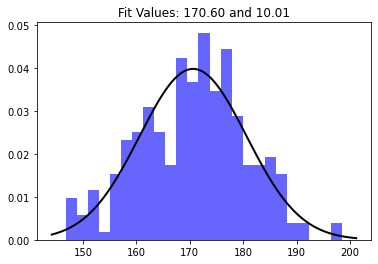

In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
  
# Generate some data for this 
# demonstration.
data = data_df. copy(deep=False)
data = np.random.normal(170, 10, 250)
  
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 4930)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()


## Step 5: Exploratory Data Analysis

### 5.1 Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A479268>,
      dtype=object)

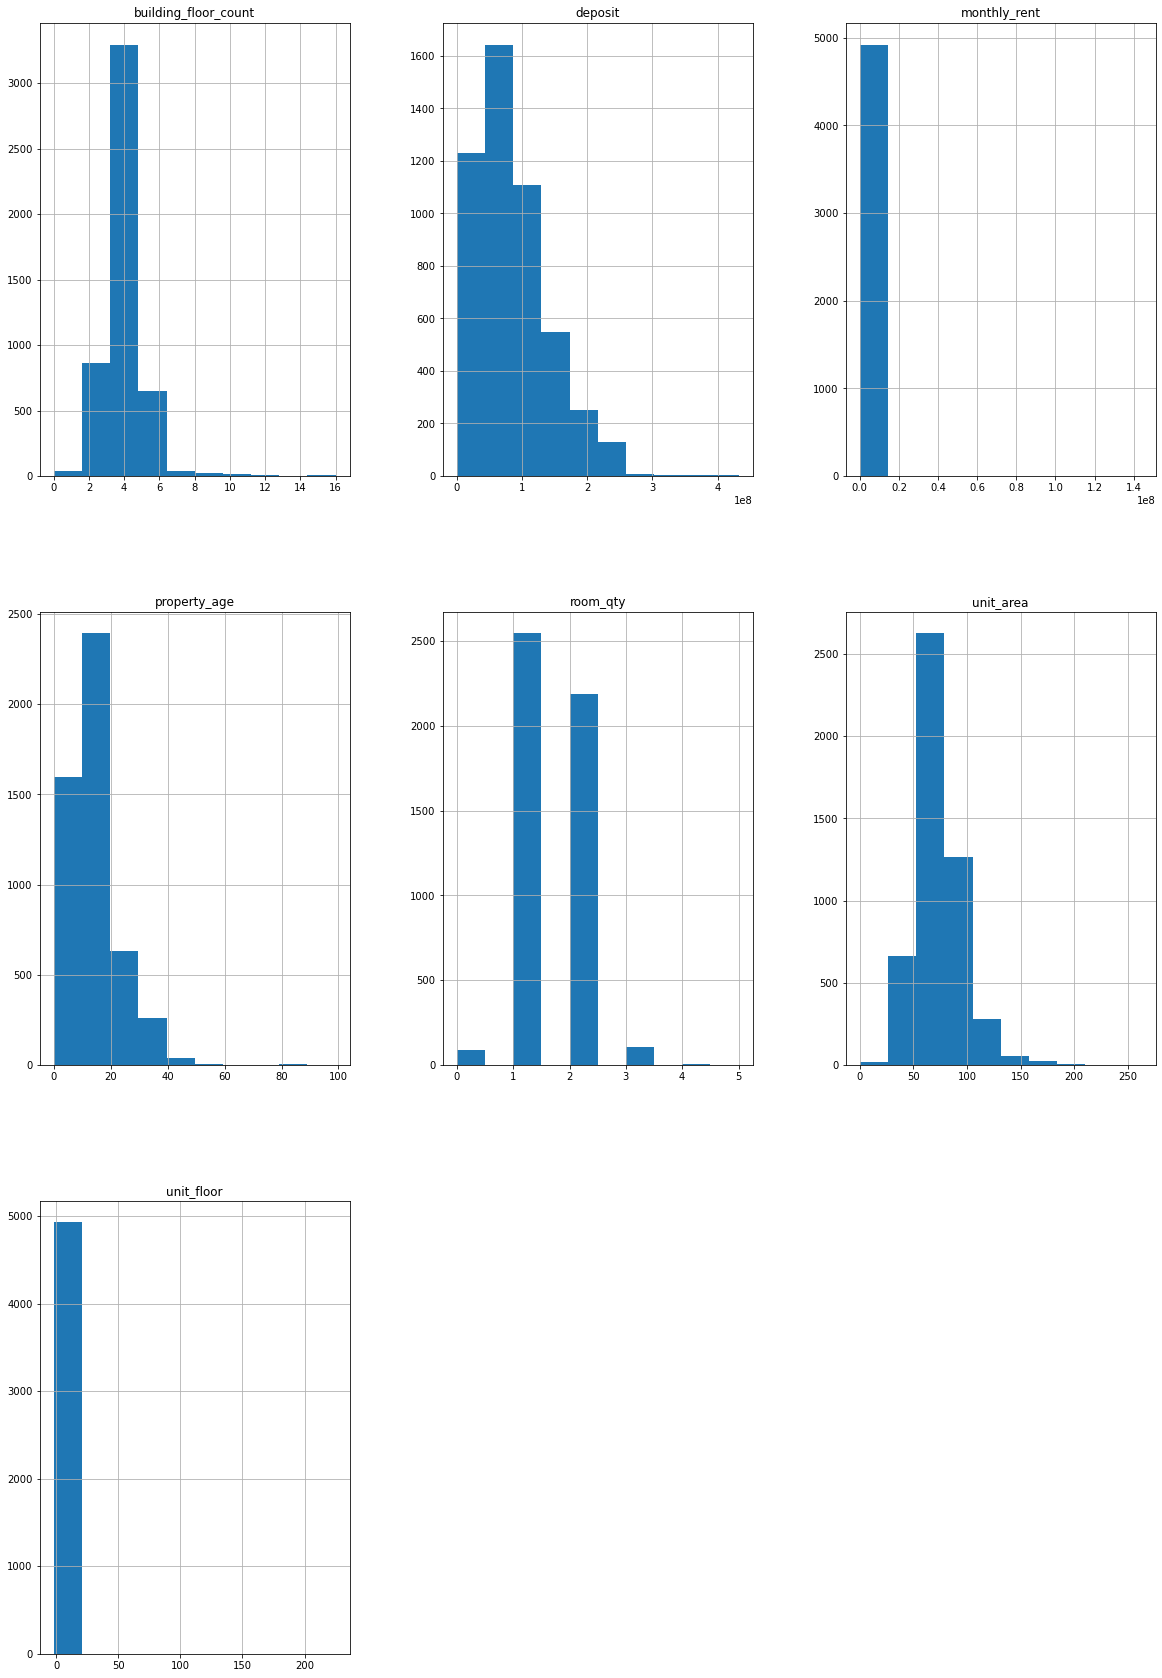

In [22]:
data_df.hist(figsize = (20,30))

### 5.2 Bivariate Analysis

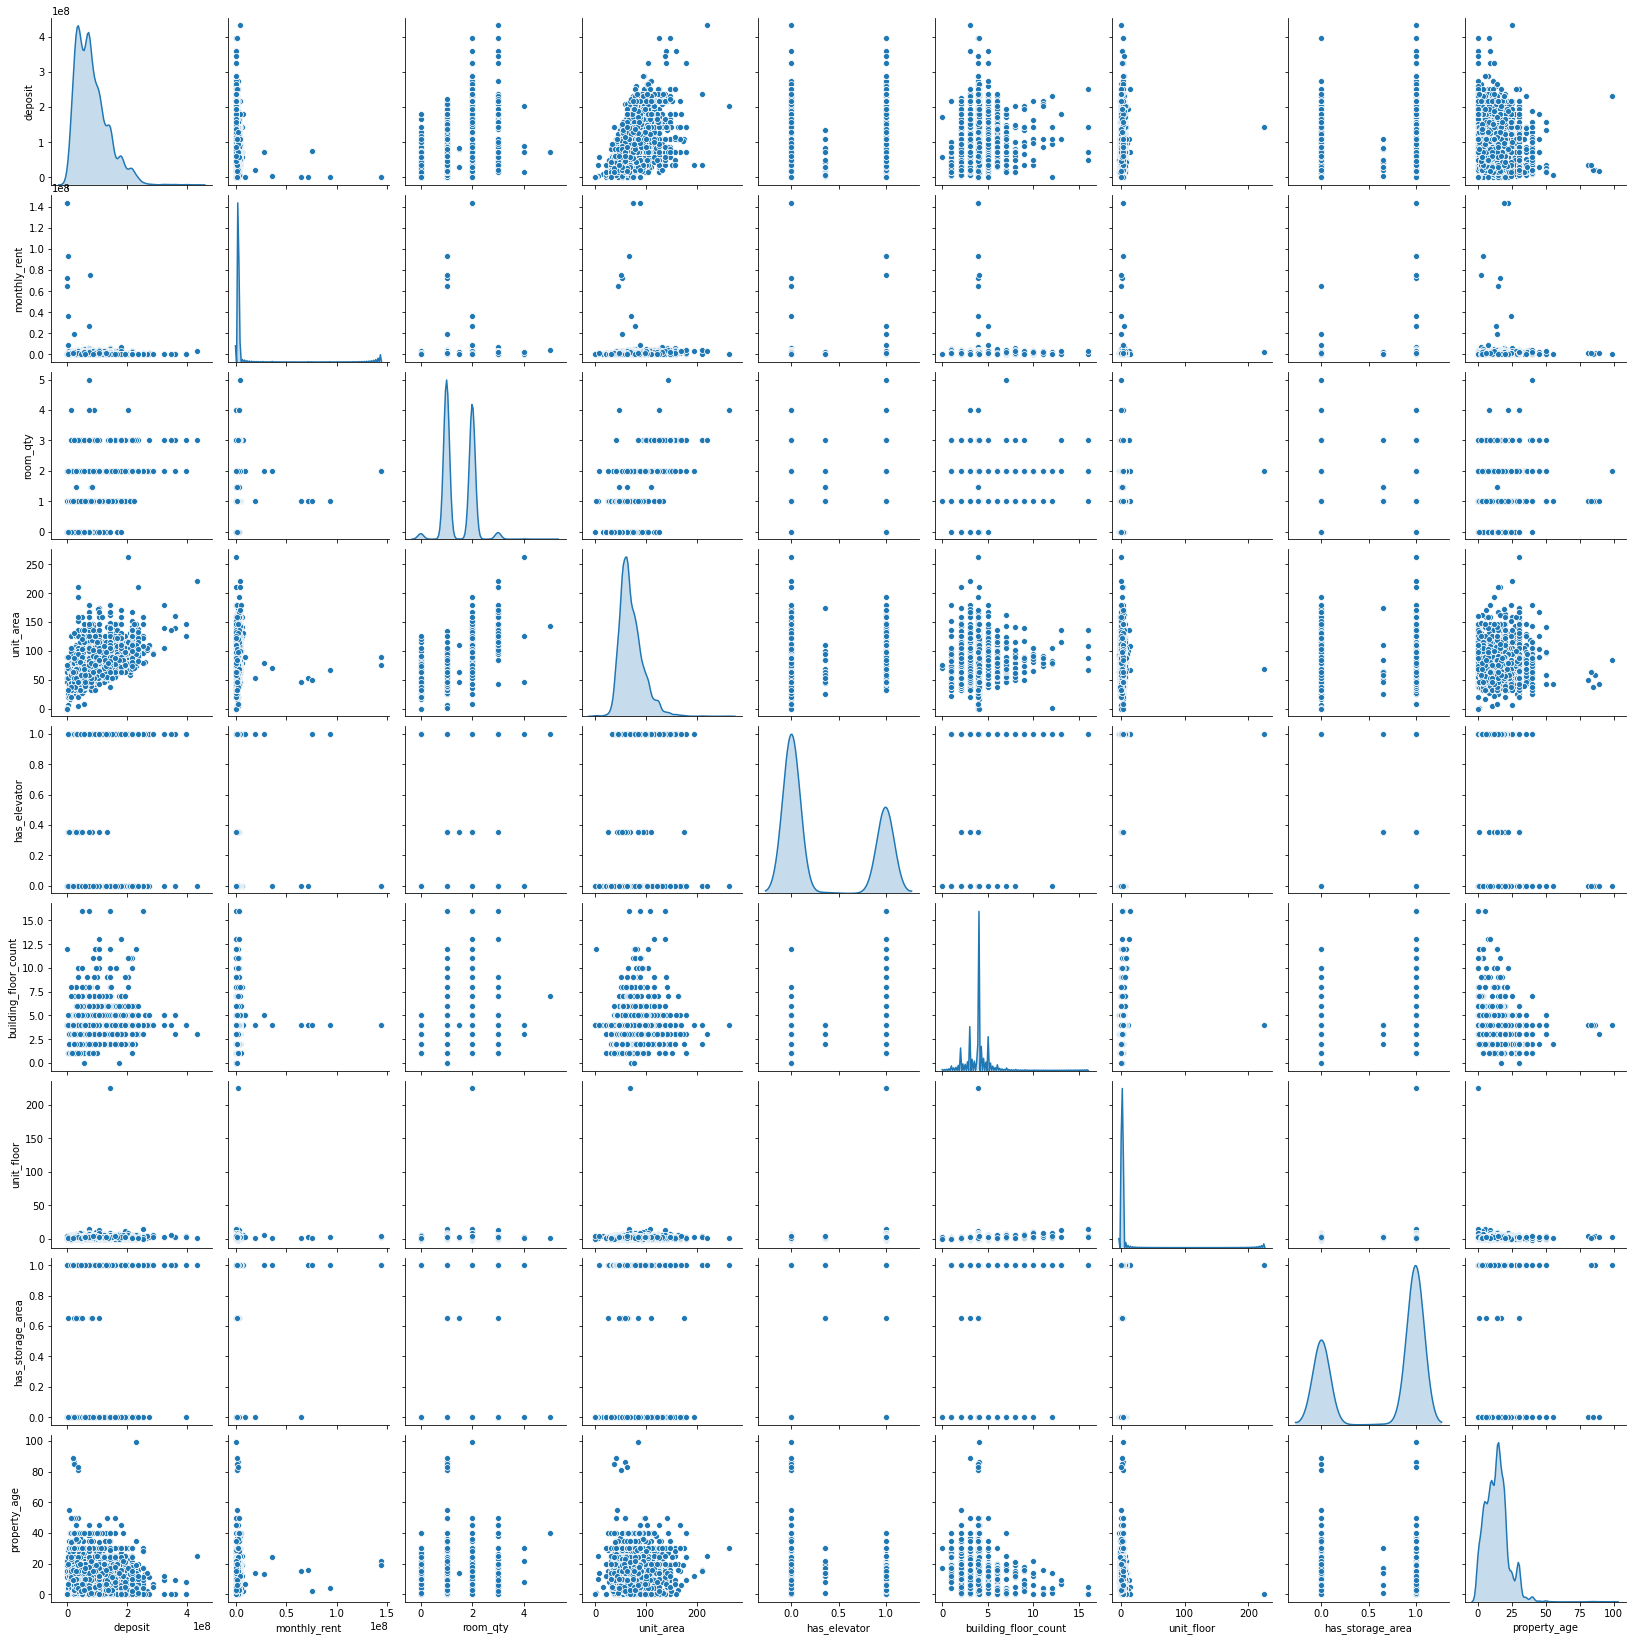

In [23]:
import seaborn as sns
sns.pairplot(data_df, diag_kind='kde') 

## Step 6: Data Preprocessing for Model Implementation

### 6.1 Standardize the dataset

In [24]:
#one_hot_encodeding
data_df1 = pd.get_dummies(data_df, columns = ['district_uuid', 'has_elevator','has_storage_area'])
print(data_df1)

                                   item_id      deposit  monthly_rent  \
0     91c0e569-bddd-4128-9720-2550bb85580e   64800000.0             0   
1     b00b7919-06be-4d26-98b8-1971787e1d46   72000000.0       4320000   
2     9eddb6bc-e424-4774-b55f-bfd54366d627   50400000.0       1440000   
3     12cf6b07-5d56-4126-94d2-ce9cbfe2214f   36000000.0        864000   
4     929eb20c-3694-46b2-b96c-91117b995d1b   28800000.0       1296000   
...                                    ...          ...           ...   
4925  6b973986-d910-4d4b-91b0-5192328bb52b    2160000.0        720000   
4926  fd8f40f5-bb1d-40f6-b8d5-9d2b4dbbef2b  129600000.0       1440000   
4927  02065751-328d-4f0e-bf50-b35e450b89dc   18000000.0       1296000   
4928  9c9800b4-280b-48fe-b86d-834509097f19   86400000.0             0   
4929  609dde7b-ef63-400c-8b0c-746bdb3c999b  108000000.0       1080000   

      room_qty  unit_area  building_floor_count  unit_floor  property_age  \
0          1.0         42               3.0000

In [25]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [26]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [27]:
# fit and assign new dataframe
scaled_data_df1 = X.fit_transform(data_df1.iloc[:,1:10])

In [28]:
# print after fit
scaled_data_df1

array([[-0.34828464, -0.27709066, -0.81473226, ...,  1.10252068,
        -0.05336519, -0.01424363],
       [-0.21209435,  0.86072754,  0.91179929, ...,  0.27701272,
        -0.05336519, -0.01424363],
       [-0.62066522,  0.10218208, -0.81473226, ...,  0.63080184,
        -0.05336519, -0.01424363],
       ...,
       [-1.23352152,  0.0642548 , -0.81473226, ..., -0.54849524,
        -0.05336519, -0.01424363],
       [ 0.06028623, -0.27709066,  0.91179929, ...,  0.15908301,
        -0.05336519, -0.01424363],
       [ 0.4688571 ,  0.00736389, -0.81473226, ..., -0.90228436,
        -0.05336519, -0.01424363]])

## Step 7: Model Design Tuning and Testing

### 7.1 Apply K-means on the scaled data. Try it with multiple K values ( K = 1 to 15) and plot a elbow plot between inertia and K value.

In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 16)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data_df1)
    kmeanModel.fit(scaled_data_df1)
 
    distortions.append(sum(np.min(cdist(scaled_data_df1, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_data_df1.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(scaled_data_df1, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_data_df1.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [30]:
# distortion values for 15 clusters
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 2.16656282714901
2 : 1.7744754157324174
3 : 1.7598293857142426
4 : 1.711358808391788
5 : 1.6890836174101003
6 : 1.5858171934120078
7 : 1.5095086783757274
8 : 1.4813697292604848
9 : 1.4447323235038863
10 : 1.3691384718192943
11 : 1.3215427386994105
12 : 1.2885923646506028
13 : 1.2458431526429155
14 : 1.246037828658688
15 : 1.2031539557565976


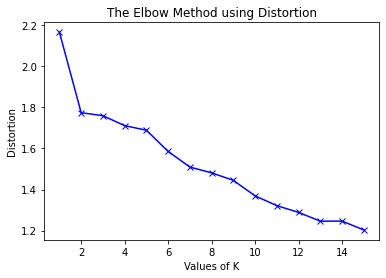

In [31]:
# elbow plot k values vs distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [32]:
# inertia values for 15 clusters
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 44370.000000000065
2 : 36909.526656359354
3 : 31904.23221526021
4 : 26983.188976482004
5 : 22980.298852740616
6 : 20372.75322241813
7 : 18791.605864168992
8 : 14847.829902485953
9 : 13357.091634413235
10 : 12025.53385384877
11 : 11341.35089775344
12 : 10844.10215467345
13 : 10371.861101069337
14 : 9945.358826286412
15 : 9470.684406959605


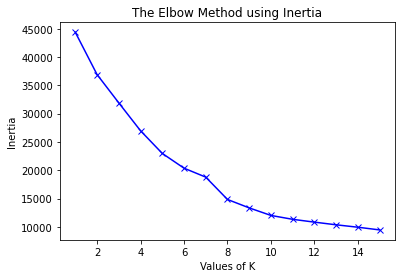

In [33]:
# elbow plot clusters vs inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### 7.2 Check the silhouette_score for K = 2,3,4,and 5

In [34]:
# check the silhouette score for k =2
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_data_df1)
labels = k_means.labels_

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [36]:
# Calculating silhouette_score
silhouette_score(scaled_data_df1,labels)

0.2915288095778391

In [37]:
# check the silhouette score for k =3
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_data_df1)
labels = k_means.labels_

In [38]:
# Calculating silhouette_score
silhouette_score(scaled_data_df1,labels)

0.2929039543204737

In [39]:
# check the silhouette score for k =4
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_data_df1)
labels = k_means.labels_

In [40]:
# Calculating silhouette_score
silhouette_score(scaled_data_df1,labels)

0.2997697929084498

In [41]:
# check the silhouette score for k =5
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_data_df1)
labels = k_means.labels_

In [42]:
# Calculating silhouette_score
silhouette_score(scaled_data_df1,labels)

0.2829436023289844

In [43]:
# check the silhouette score for k =6
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_data_df1)
labels = k_means.labels_

In [44]:
# Calculating silhouette_score
silhouette_score(scaled_data_df1,labels)

0.2843794323492535

In [45]:
# check the silhouette score for k =7
k_means = KMeans(n_clusters = 7)
k_means.fit(scaled_data_df1)
labels = k_means.labels_

In [46]:
# Calculating silhouette_score
silhouette_score(scaled_data_df1,labels)

0.28274326866825933

In [47]:
# check the silhouette score for k =8
k_means = KMeans(n_clusters = 8)
k_means.fit(scaled_data_df1)
labels = k_means.labels_

In [48]:
# Calculating silhouette_score
silhouette_score(scaled_data_df1,labels)

0.259153854406322

In [49]:
# check the silhouette score for k =9
k_means = KMeans(n_clusters = 9)
k_means.fit(scaled_data_df1)
labels = k_means.labels_

In [50]:
# Calculating silhouette_score
silhouette_score(scaled_data_df1,labels)

0.2753999629131837

### 7.3 Report the optimal K value and fit the data clustering model using it. 

### Silhouette score is better for 7 clusters than for 8 clusters . So, final clusters will be 7

### 7.4 add cluster label to the final dataset (before scaling) for cluster profliling

In [51]:
# adding cluster label to the final dataset of bfore scaling
data_df["Clus_kmeans7"] = labels
data_df.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age,Clus_kmeans7
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.00000,0.0,True,23.0,0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,3.97075,1.0,True,16.0,2
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.00000,0.0,True,19.0,8
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,3.97075,2.0,False,6.0,0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,3.97075,1.0,True,4.0,0


## Step 8: Cluster Profiling

Check crosstab between cluster label and other features and comment on the result

In [52]:
# cluster labes and value counts
data_df.Clus_kmeans7.value_counts().sort_index()

0    2242
1      86
2    1226
3       1
4       1
5      14
6     844
7       6
8     510
Name: Clus_kmeans7, dtype: int64

In [53]:
# cluster profile for selected clus_kmeans7
clust_profile=data_df.drop(['item_id'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans7').mean()
clust_profile['freq']=data_df.Clus_kmeans7.value_counts().sort_index()
clust_profile

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,freq
Clus_kmeans7,,,,,,,,
0,6.102296e+07,7.522009e+05,0.968307,55.967886,3.921573,2.336646,11.900514,2242
1,1.125460e+08,1.205581e+06,1.604651,81.476744,8.790698,4.156013,6.988372,86
2,7.231103e+07,1.440294e+06,2.028933,79.501631,4.004757,2.576267,12.994821,1226
3,4.320000e+08,3.600000e+06,3.000000,221.000000,3.000000,1.000000,25.000000,1
4,1.440000e+08,2.160000e+06,2.000000,69.000000,3.970750,225.000000,0.000000,1
5,8.316000e+07,9.668571e+05,1.571429,77.357143,3.850875,1.428571,20.785714,14
6,1.667129e+08,5.631355e+05,2.034360,96.951422,4.195896,2.570501,10.575829,844
7,1.287600e+07,9.900000e+07,1.333333,63.333333,3.975625,2.402854,13.000000,6
8,6.386340e+07,1.062875e+06,1.388235,77.872549,2.924949,1.434969,28.952941,510


- Cluster 0: Properties with less deposit,rent,property age and high floor count, unit floor
- Cluster 1: Properties with less deposit,floor count and high unit area, property age
- Cluster 2: Properties with high deposit,property age and less deposit, property age
- Cluster 3: Properties with high deposit, rent,property age and less unit area, room quantity
- Cluster 4: Properties with medium deposit,rent,property age and high unit area,room quantity and less unit floor 
- Cluster 5: Properties with less deposit,less rent, new property 
- Cluster 6: Properties with less deposit,room quantity and high property age, rent and medium unit floor 
- Cluster 7: Properties with high deposit,rent, property age, rent and less unit floor, unit area 
- Cluster 8: Properties with high deposit,high property age and less rent, room, unit floor 

## Step 9: Model pickling and Model Deployment (Web or UI)

In [54]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(data_df)
 
# Load the pickled model
data_df_from_pickle = pickle.loads(saved_model)

## Step 10: Conclusion

1. The properties in cluster 4 seems to have medium deposit,rent,property age and high unit area,room quantity and less unit floor. These properties may be recommended to the customers.


2. The properties in cluster 0 seems to have Properties with less deposit,rent,property age and high floor count, unit floor.These properties may be recommended more to the customers. 


# Optional Steps

## 6. Hierarchical Clustering

## 7. PCA

## 8. Hierarchical Clustering on PCA Transformed data